In [ ]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

In [ ]:
np.random.seed(1)
train = pd.read_csv("CensusCanada2016Training.csv")

In [ ]:
train.head().T

,0,1,2,3,4
Total Population,4051.00,2329.00,5276.00,5967.00,4236.00
Total Households,1441.00,1026.00,2071.00,2203.00,1419.00
Median Household Income (Current Year $),68242.12,88172.37,103853.38,82796.63,91648.22
Total Households For Period Of Construction,1441.00,1026.00,2071.00,2203.00,1419.00
Total Households For Period Of Construction Built Before 1961,323.00,927.00,3.00,133.00,0.00
Total Households For Period Of Construction Built Between 1961 And 1980,199.00,70.00,607.00,1695.00,7.00
Total Households For Period Of Construction Built Between 1981 And 190,53.00,15.00,567.00,248.00,127.00
Total Households For Period Of Construction Built Between 1991 And 2000,182.00,3.00,651.00,79.00,938.00
Total Households For Period Of Construction Built Between 2001 And 2005,526.00,0.00,106.00,0.00,143.00
Total Households For Structure Type Houses,911.00,792.00,1418.00,1397.00,914.00


In [ ]:
train.shape

(5000, 15)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   Total Population                                                           5000 non-null   int64  
 1   Total Households                                                           5000 non-null   int64  
 2   Median Household Income (Current Year $)                                   5000 non-null   float64
 3   Total Households For Period Of Construction                                5000 non-null   int64  
 4   Total Households For Period Of Construction Built Before 1961              5000 non-null   int64  
 5   Total Households For Period Of Construction Built Between 1961 And 1980    5000 non-null   int64  
 6   Total Households For Period Of Construction Built Betwee

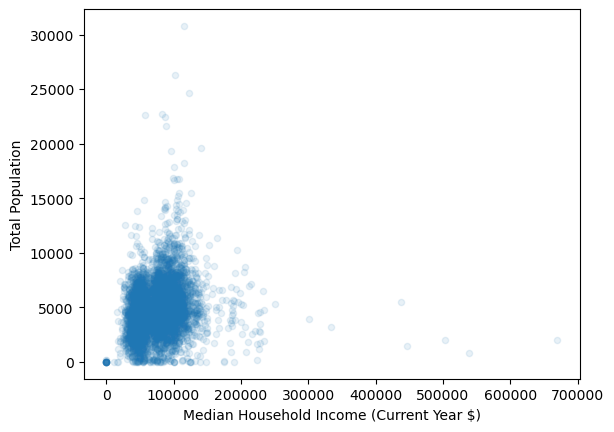

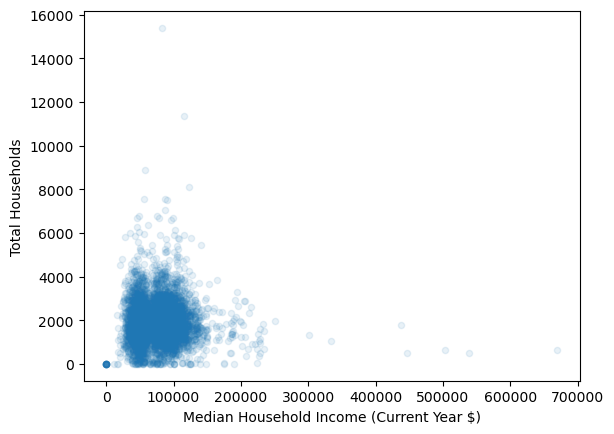

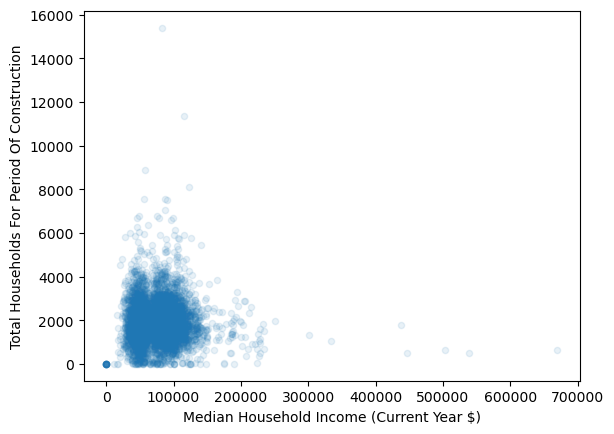

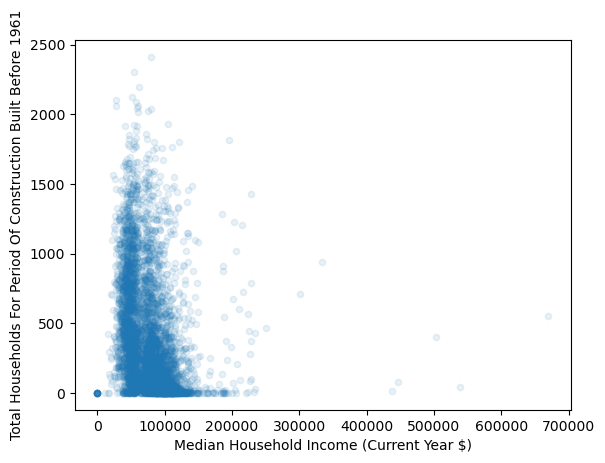

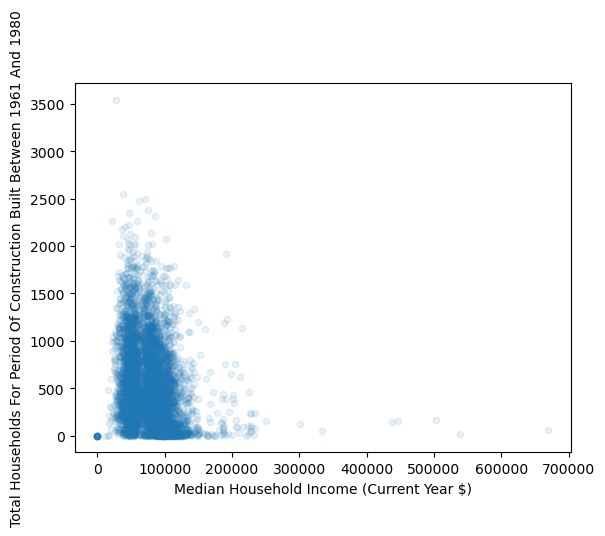

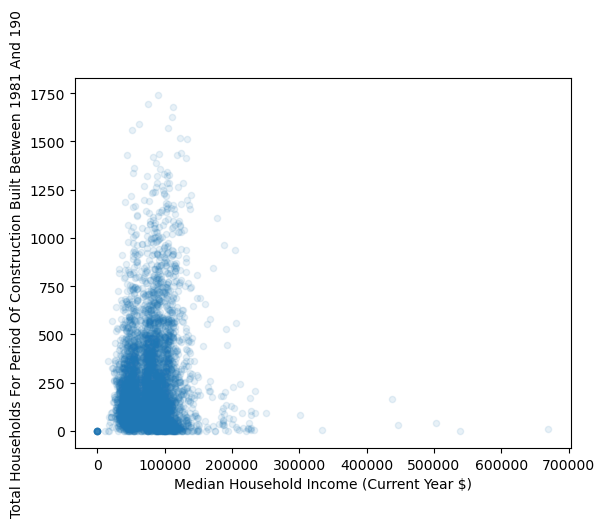

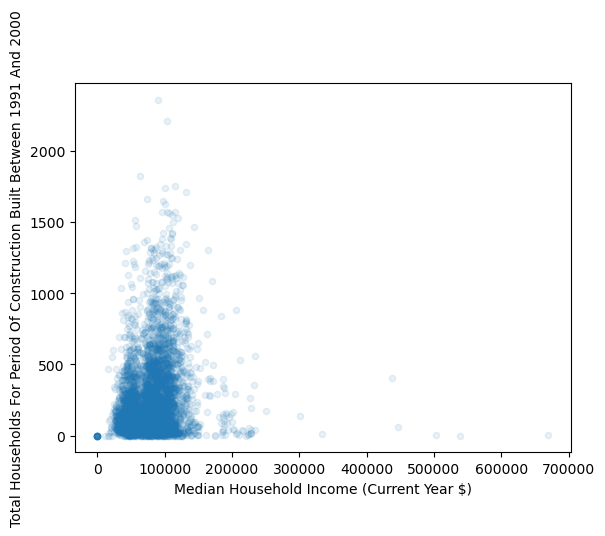

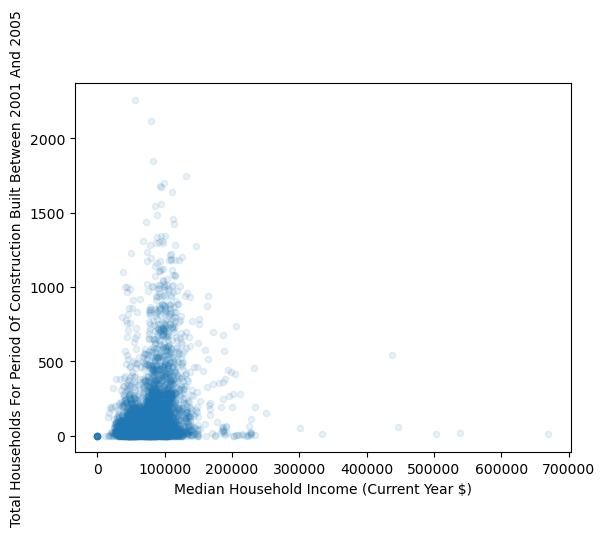

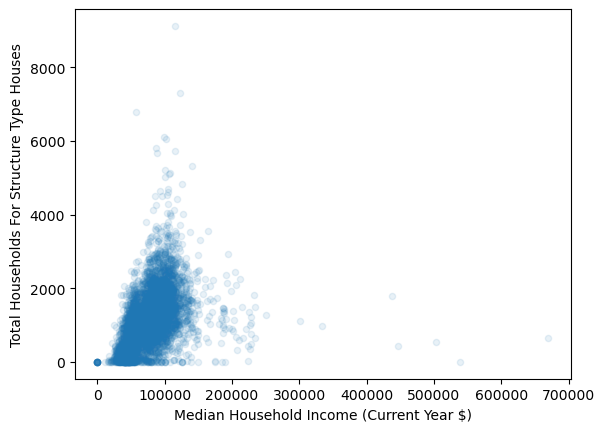

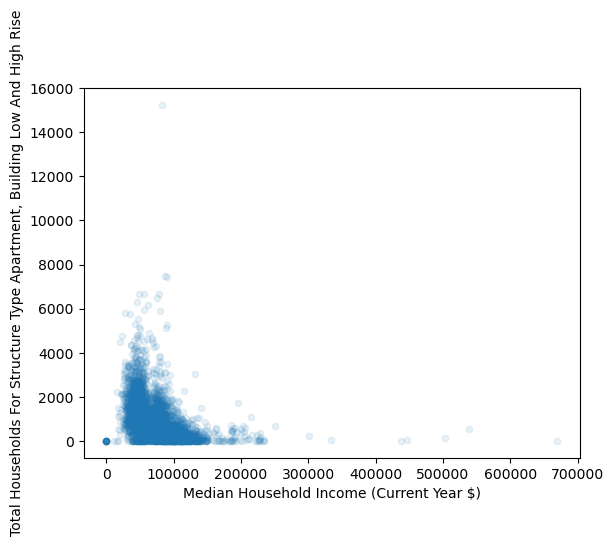

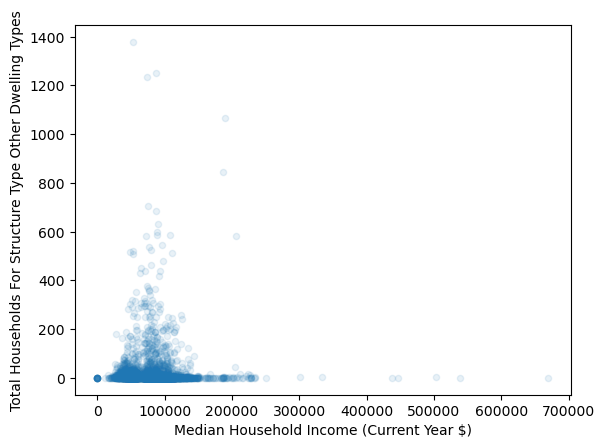

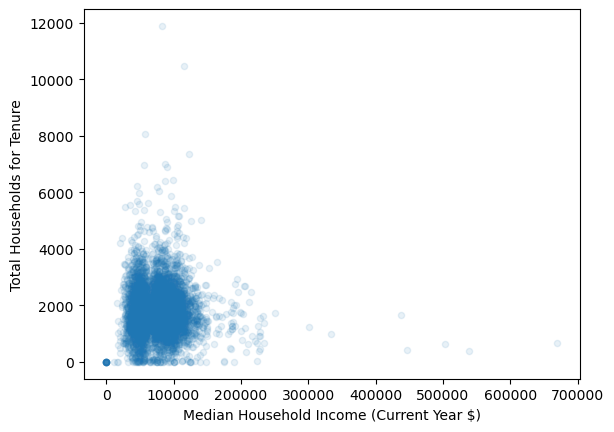

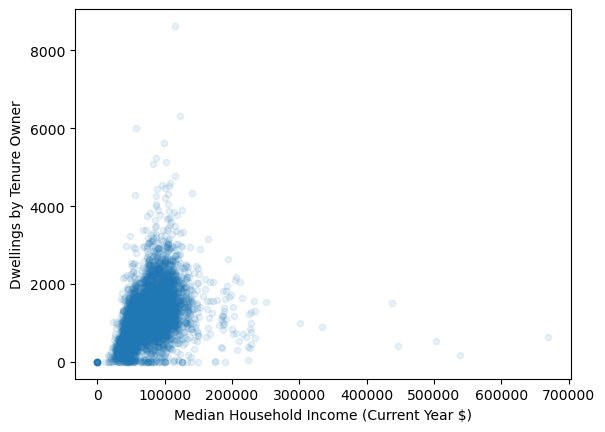

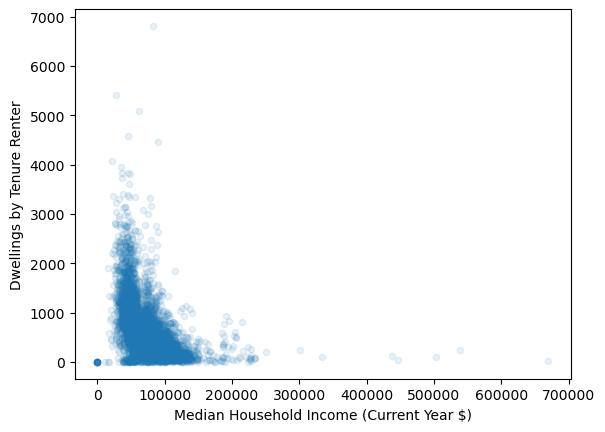

In [ ]:
train_df = pd.DataFrame(train)

for column in train_df.columns:
    if column != 'Median Household Income (Current Year $)':
        train_df.plot(kind = "scatter", x = 'Median Household Income (Current Year $)', y = column, alpha=0.1)

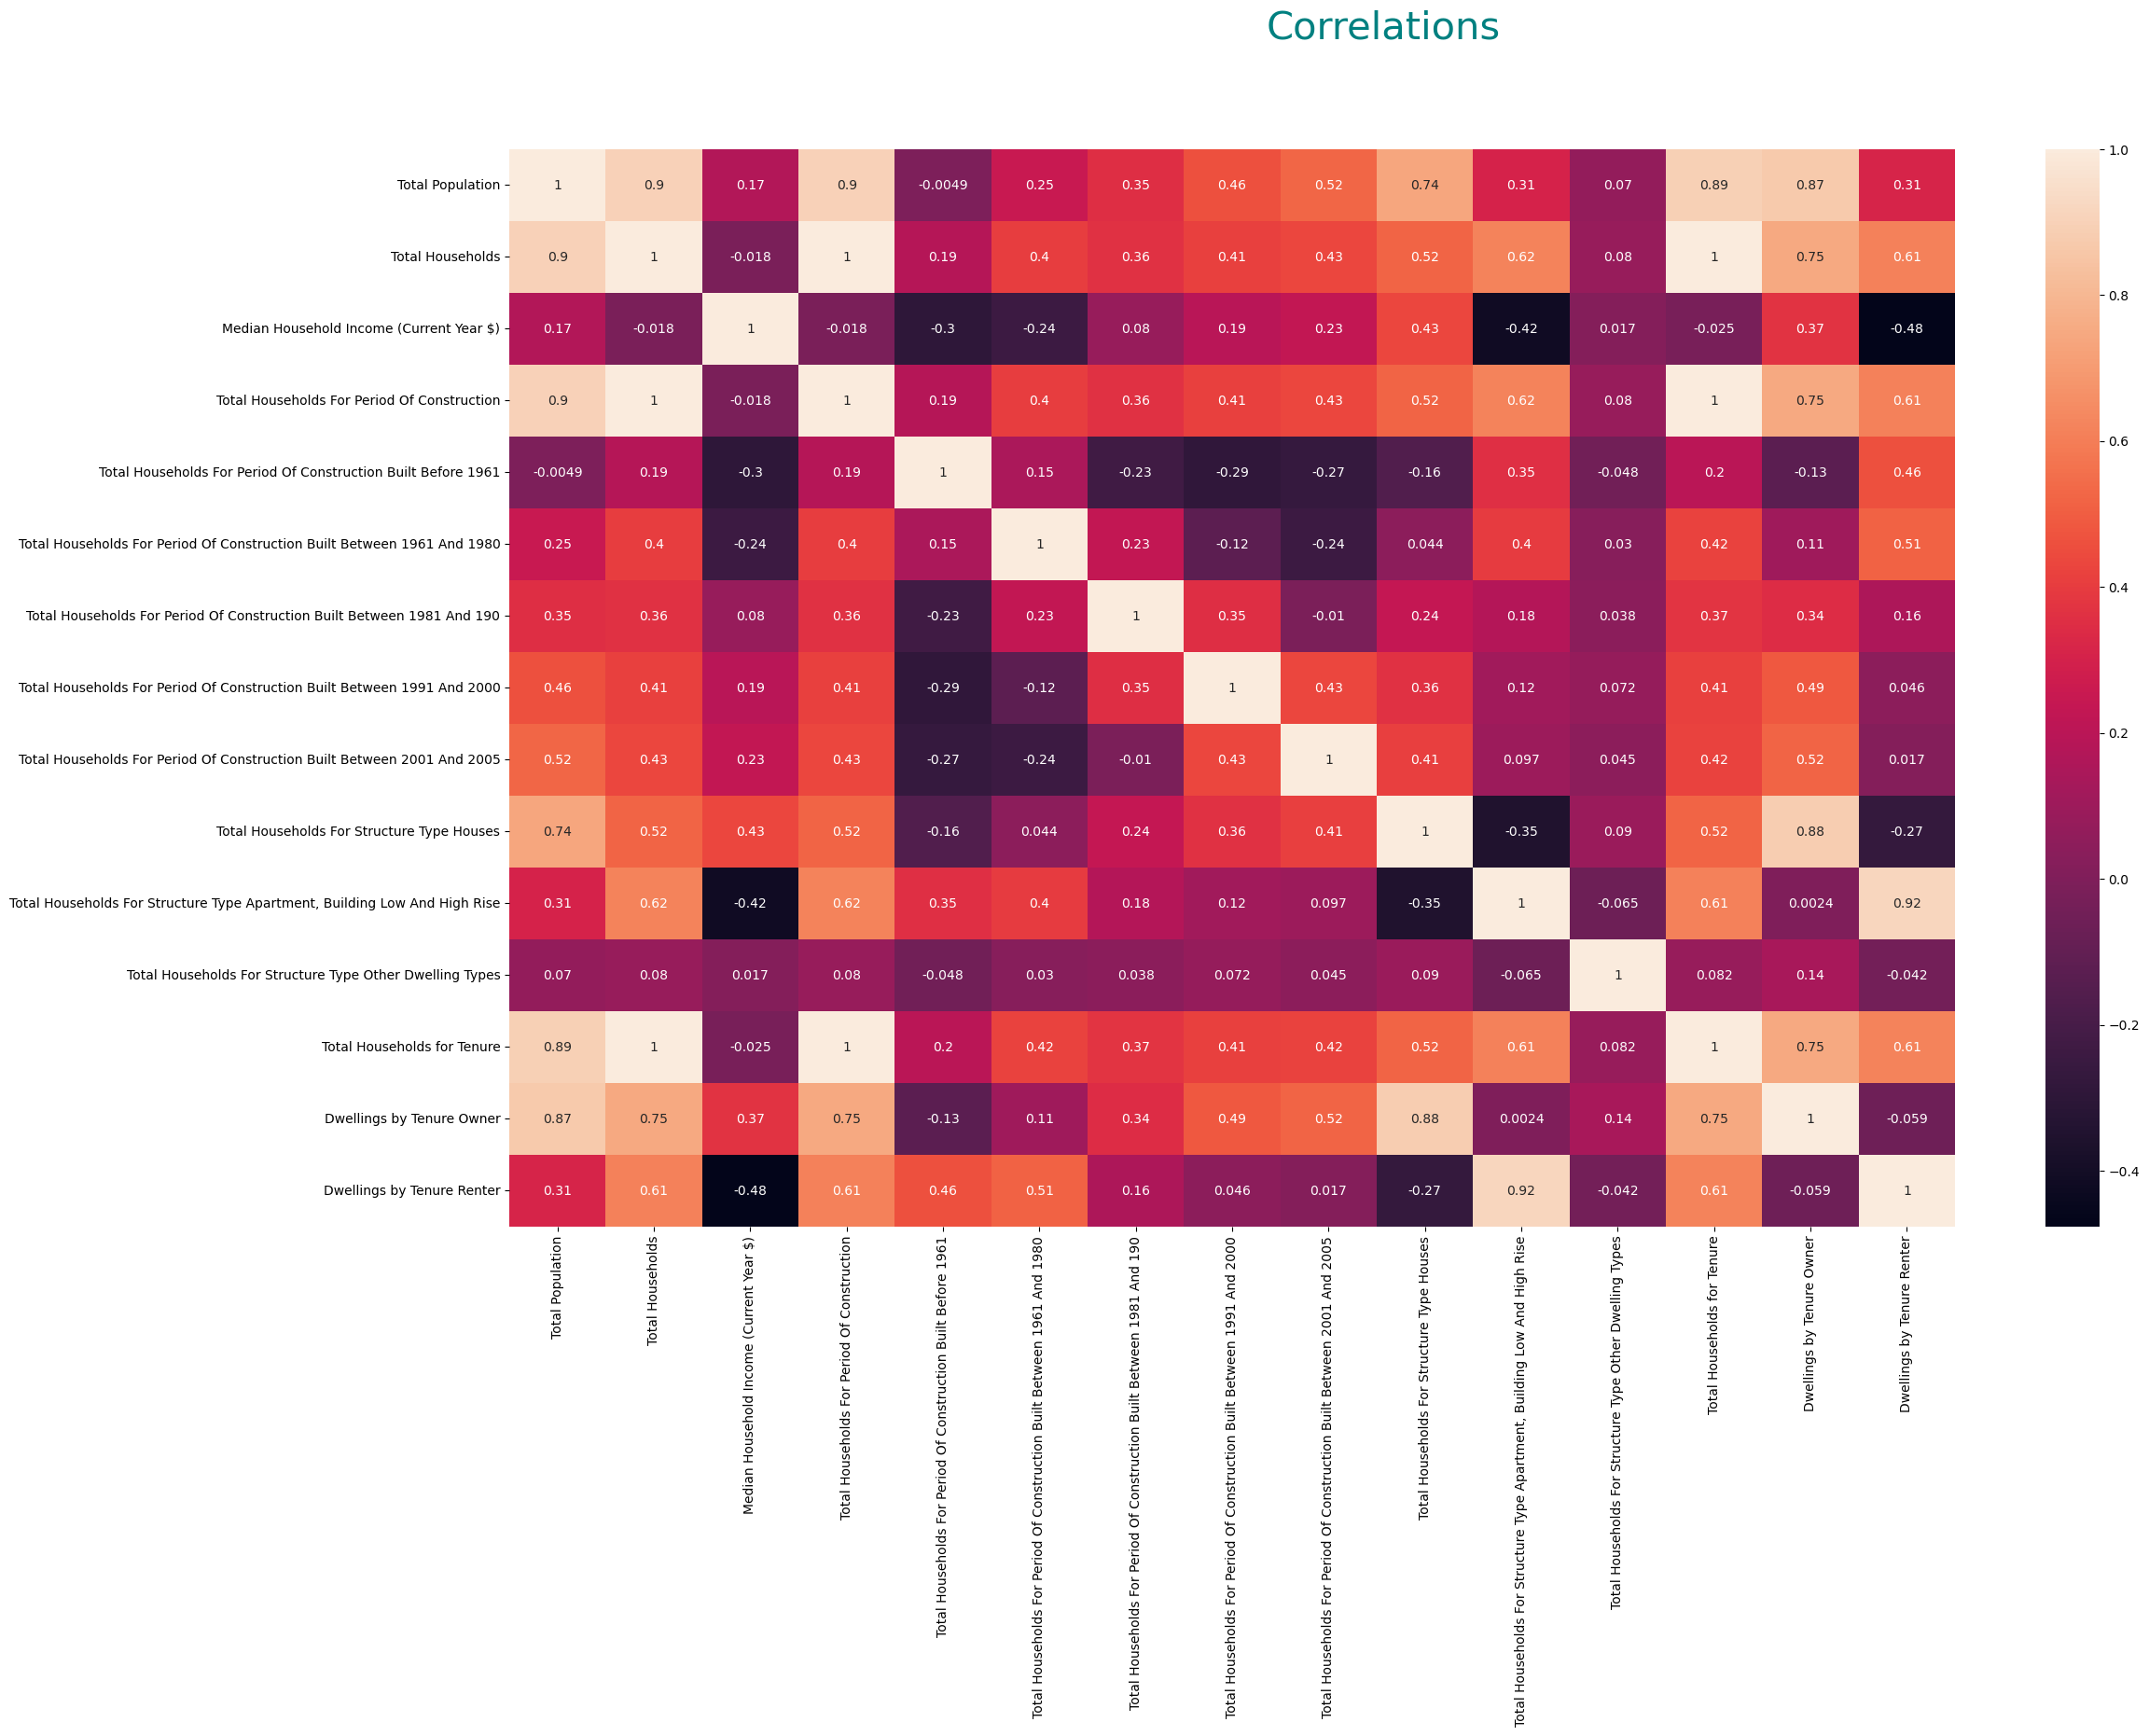

In [ ]:
plt.figure(figsize=(25, 15))
plt.suptitle('Correlations', fontsize = 30, color= 'teal')
corr = pd.DataFrame(train).corr()
sns.heatmap(corr, annot=True)
plt.show()

TypeError: object of type 'int' has no len()

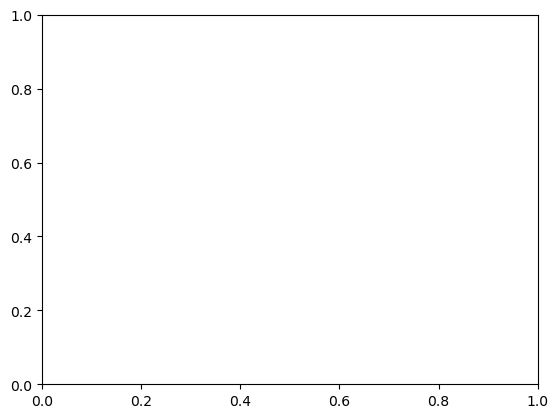

In [ ]:
# Start of cluster analysis
X = 1
y = 1

range_n_clusters = [3, 4, 5, 6, 7, 8]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, ax1 = plt.subplots(1, 1)

    # The 1st subplot is the silhouette plot
    ax1.set_xlim([0, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=20210420)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is : %.4f"  % silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    
    # Iterate over the clusters
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("Silhouette plot for the various clusters (n_clusters=%i)." % (n_clusters))
    ax1.set_xlabel("Silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])